### Import libraries and set dataframe (2 and 3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("https://bitbucket.org/morkiss/testrepository/raw/3846baf084124f056208233f4beb5ae69e6aa64d/loans_2007.csv", 
                   error_bad_lines=False)
df = pd.DataFrame(data) 
df.head(n=5)

loan_amnt  int_rate  installment  emp_length  annual_inc  loan_status  \
0     5000.0     10.65       162.87          10     24000.0            1   
1     2500.0     15.27        59.83           0     30000.0            0   
2     2400.0     15.96        84.33          10     12252.0            1   
3    10000.0     13.49       339.31          10     49200.0            1   
4     5000.0      7.90       156.46           3     36000.0            1   

   zip_code    dti  delinq_2yrs  fico_range_high  ...  purpose_major_purchase  \
0       860  27.65          0.0            739.0  ...                     0.0   
1       309   1.00          0.0            744.0  ...                     0.0   
2       606   8.72          0.0            739.0  ...                     0.0   
3       917  20.00          0.0            694.0  ...                     0.0   
4       852  11.20          0.0            734.0  ...                     0.0   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0              0.0             0.0            0.0                       0.0   
1              0.0             0.0            0.0                       0.0   
2              0.0             0.0            0.0                       0.0   
3              0.0             0.0            1.0                       0.0   
4              0.0             0.0            0.0                       0.0   

   purpose_small_business  purpose_vacation  purpose_wedding  term_ 36 months  \
0                     0.0               0.0              0.0              1.0   
1                     0.0               0.0              0.0              0.0   
2                     1.0               0.0              0.0              1.0   
3                     0.0               0.0              0.0              1.0   
4                     0.0               0.0              1.0              1.0   

   term_ 60 months  
0              0.0  
1              1.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 41 columns]

### Loan amount histogram with seaborn and pandas (4)

Text(0, 0.5, 'Frequency')

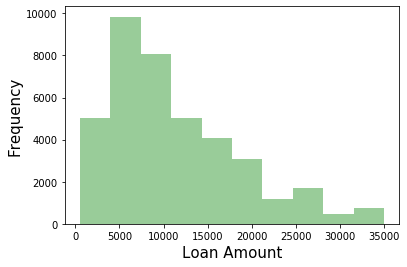

In [2]:
sns.distplot(df['loan_amnt'], kde=False, color='green', bins=10)
plt.xlabel('Loan Amount', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

Text(0, 0.5, 'Frequency')

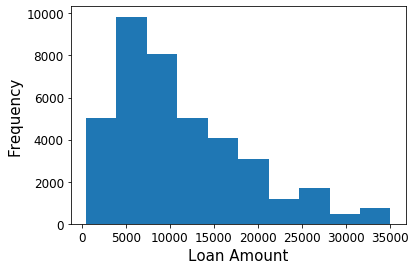

In [3]:
df['loan_amnt'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Loan Amount", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

### Loan amount per purpose bar chart (5)

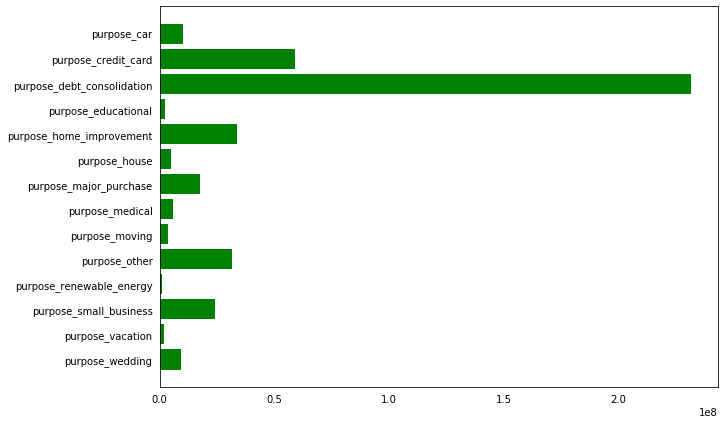

In [71]:
# Dynamically iterate trough purpose columns
purpose_cols = [col for col in df.columns if 'purpose' in col]
#print(purpose_cols)

# Define function which will return purpose as text
def label_col (row, my_cols):
    for i, val in enumerate(my_cols):
        if row[val]==1:
            return val

# Add new column with decoded purpose
df['purpose'] = df.apply(lambda row: label_col(row, purpose_cols), axis=1)
df

# Drop not required columns
data = df.drop(columns=df.iloc[:,1:42])
data

# Sum loan amount by purpose
df1=data.groupby('purpose')['loan_amnt'].sum().reset_index(name='loan_sum')
df1

# Figure Size
fig, ax = plt.subplots(figsize=(10,7))

# Horizontal Bar Plot
ax.barh(df1.iloc[:,0], df1.iloc[:,1], color='green')
    
# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Show top values 
ax.invert_yaxis()

# Show Plot
plt.show()

### Loan amount boxplot and descriptive statistics (6)

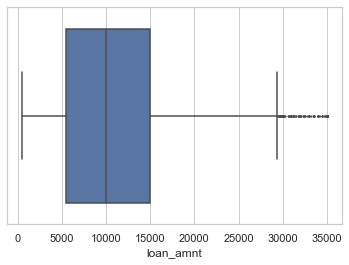

In [57]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["loan_amnt"], fliersize=1)

#### Below values and the boxplot indicates that majority of the loan amount values fall between 5000 and 15000. High loan amounts (above 30000) are outliers and are rare. 75% of loans taken are below amount of 15000.

In [90]:
print('median:', df.loan_amnt.median(),
    '\nmin:', df.loan_amnt.min(), 
    '\nmax:', df.loan_amnt.max(),
    '\nQ1:', df.loan_amnt.quantile([.25]),
    '\nQ3:', df.loan_amnt.quantile([.75]))

median: 10000.0 
min: 500.0 
max: 35000.0 
Q1: 0.25    5400.0
Name: loan_amnt, dtype: float64 
Q3: 0.75    15000.0
Name: loan_amnt, dtype: float64


### Scatter plot of loans and loan repayment term (7)
#### Out of ideas and time to think on how to show required values as a scatterplot, so this one is not complete :)

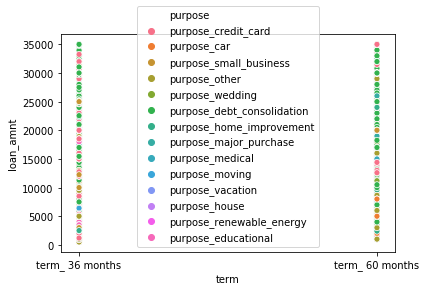

In [86]:
# Dynamically iterate trough purpose columns
purpose_cols = [col for col in df.columns if 'purpose' in col]
#print(purpose_cols)

# Dynamically iterate trough term columns
term_cols = [col for col in df.columns if 'term' in col]


# Define function which will return purpose as text
def label_col (row, my_cols):
    for i, val in enumerate(my_cols):
        if row[val]==1:
            return val

# Add new column with decoded term
df['term'] = df.apply(lambda row: label_col(row, term_cols), axis=1)


# Add new column with decoded purpose
df['purpose'] = df.apply(lambda row: label_col(row, purpose_cols), axis=1)

# Show scatterplot
ax = sns.scatterplot(x="term", y="loan_amnt", hue='purpose', data=df)